# Text Mining 

In [7]:
!pip install -U spacy

In [8]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
!pip install wordcloud

In [10]:
#perform sentimental amalysis
import pandas as pd #data processing
import numpy as np #linear algebra
import string #special operation on string 
import spacy #language model 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import wordcloud
from wordcloud  import WordCloud,STOPWORDS
%matplotlib inline

In [11]:
elon_musk_data = pd.read_csv('Elon_musk.csv',encoding='latin1')
elon_musk_data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [12]:
elon_musk_data.drop(['Unnamed: 0'],inplace=True,axis=1)
elon_musk_data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Text pre-processing

In [13]:
elon_musk_data= [Text.strip() for Text in elon_musk_data.Text] #remove both the leading and the trailing characters
elon_musk_data = [Text for Text  in elon_musk_data if Text] # remove empty strings, because they are considered in python as False

In [14]:
# joining the list into one string or Text
text_data = ' '.join(elon_musk_data)
text_data

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [15]:
#Punctuation
no_punc_text = text_data.translate(str.maketrans('','', string.punctuation)) #with arguements (x, y, z) where 'x' and 'y'
# must be equal-length string and characters in 'x'
# are replaced by caharcters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [16]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won\x92t give you your private keys should

In [17]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lavanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lavanya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.tokenize import word_tokenize
token_text=word_tokenize(no_url_text)
print(token_text)

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil'

In [19]:
#Token couts
len(token_text)

20423

In [20]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.append('the')
no_stop_token = [word for word in token_text if not word in stop_words]
print(no_stop_token)

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'U0001F923U0001

In [21]:
#normalize the data
lower_case = [x.lower() for x in no_stop_token]
print(lower_case)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'just', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001

In [22]:
#stemming 
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stem_tokens = [ps.stem(word) for word in lower_case]
print(stem_tokens)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'geoffkeighley', 'unrealengin', 'it\x92', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'u0001f923u0001f923', 'thi', 'true', 'power', 'haha', 'freewalletorg', 'ani', 'cr

In [23]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_case))
print(doc)

kunalb11 im alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation the entertaining outcome likely givedirectly just sent just agree clubhouse kanyewest geoffkeighley unrealengine its getting real bought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet wont give private keys avoided costs freewalletorg your app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predic

In [24]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'just', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'this', 'true'

In [25]:
clean_tweet = ' '.join(lemmas)
clean_tweet

'kunalb11 i\x92m alien idaacarmack ray trace cyberpunk hdr nextlevel have try joerogan spotify great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owenspark flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweet definitely represent realworld time allocation the entertaining outcome likely givedirectly just send just agree clubhouse kanyewest geoffkeighley unrealengine it\x92s get real buy dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet won\x92t give private key avoid cost freewalletorg your app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predict cash flow reasona

## Feature Extraction

### 1. Using countvectorizer 

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X= vectorizer.fit_transform(lemmas)

In [27]:
print(vectorizer.vocabulary_)

{'kunalb11': 2045, 'alien': 229, 'idaacarmack': 1784, 'ray': 2950, 'trace': 3810, 'cyberpunk': 962, 'hdr': 1671, 'nextlevel': 2492, 'have': 1665, 'try': 3845, 'joerogan': 1965, 'spotify': 3437, 'great': 1606, 'interview': 1894, 'gtera27': 1624, 'doge': 1115, 'underestimate': 3975, 'teslacn': 3658, 'congratulation': 855, 'tesla': 3652, 'china': 739, 'amazing': 255, 'execution': 1327, 'last': 2064, 'year': 4248, 'now': 2532, 'next': 2491, 'even': 1298, 'happy': 1652, 'new': 2488, 'ox': 2650, 'frodo': 1492, 'underdoge': 3974, 'all': 232, 'thought': 3735, 'would': 4224, 'fail': 1363, 'himself': 1717, 'owenspark': 2646, 'flcnhvy': 1434, 'anonyx10': 284, 'haha': 1638, 'thanks': 3695, 'indeed': 1834, 'tweet': 3864, 'definitely': 1017, 'represent': 3033, 'realworld': 2975, 'time': 3753, 'allocation': 234, 'the': 3702, 'entertaining': 1254, 'outcome': 2626, 'likely': 2126, 'givedirectly': 1577, 'just': 1993, 'send': 3214, 'agree': 200, 'clubhouse': 780, 'kanyewest': 2002, 'geoffkeighley': 1557,

In [28]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray())

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
print(X.toarray().shape)

(15123, 4281)


## 2.  Countvectorize with N-grams (Bigrams &Trigrams)

In [30]:
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)


In [31]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ajtourville', 'also', 'amp', 'big', 'car', 'cleantechnica', 'come', 'cool', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'neuralink', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'we re', 'week', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yeah', 'year', 'yes', 'you'

## 3. TF-IDF vectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [33]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '13', '20', '28delayslater', '30', '60', 'able', 'absolutely', 'accurate', 'actually', 'adamklotz', 'add', 'agree', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'another', 'appreciate', 'archillect', 'around', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'benmezrich', 'berlin', 'berniesander', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass3d', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'crew1', 'critical', 'curevac', 'cyberpunkgame', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'design', 'detail', 'didn', 'difference', 'different', 'djsnm', '

## Generate word cloud

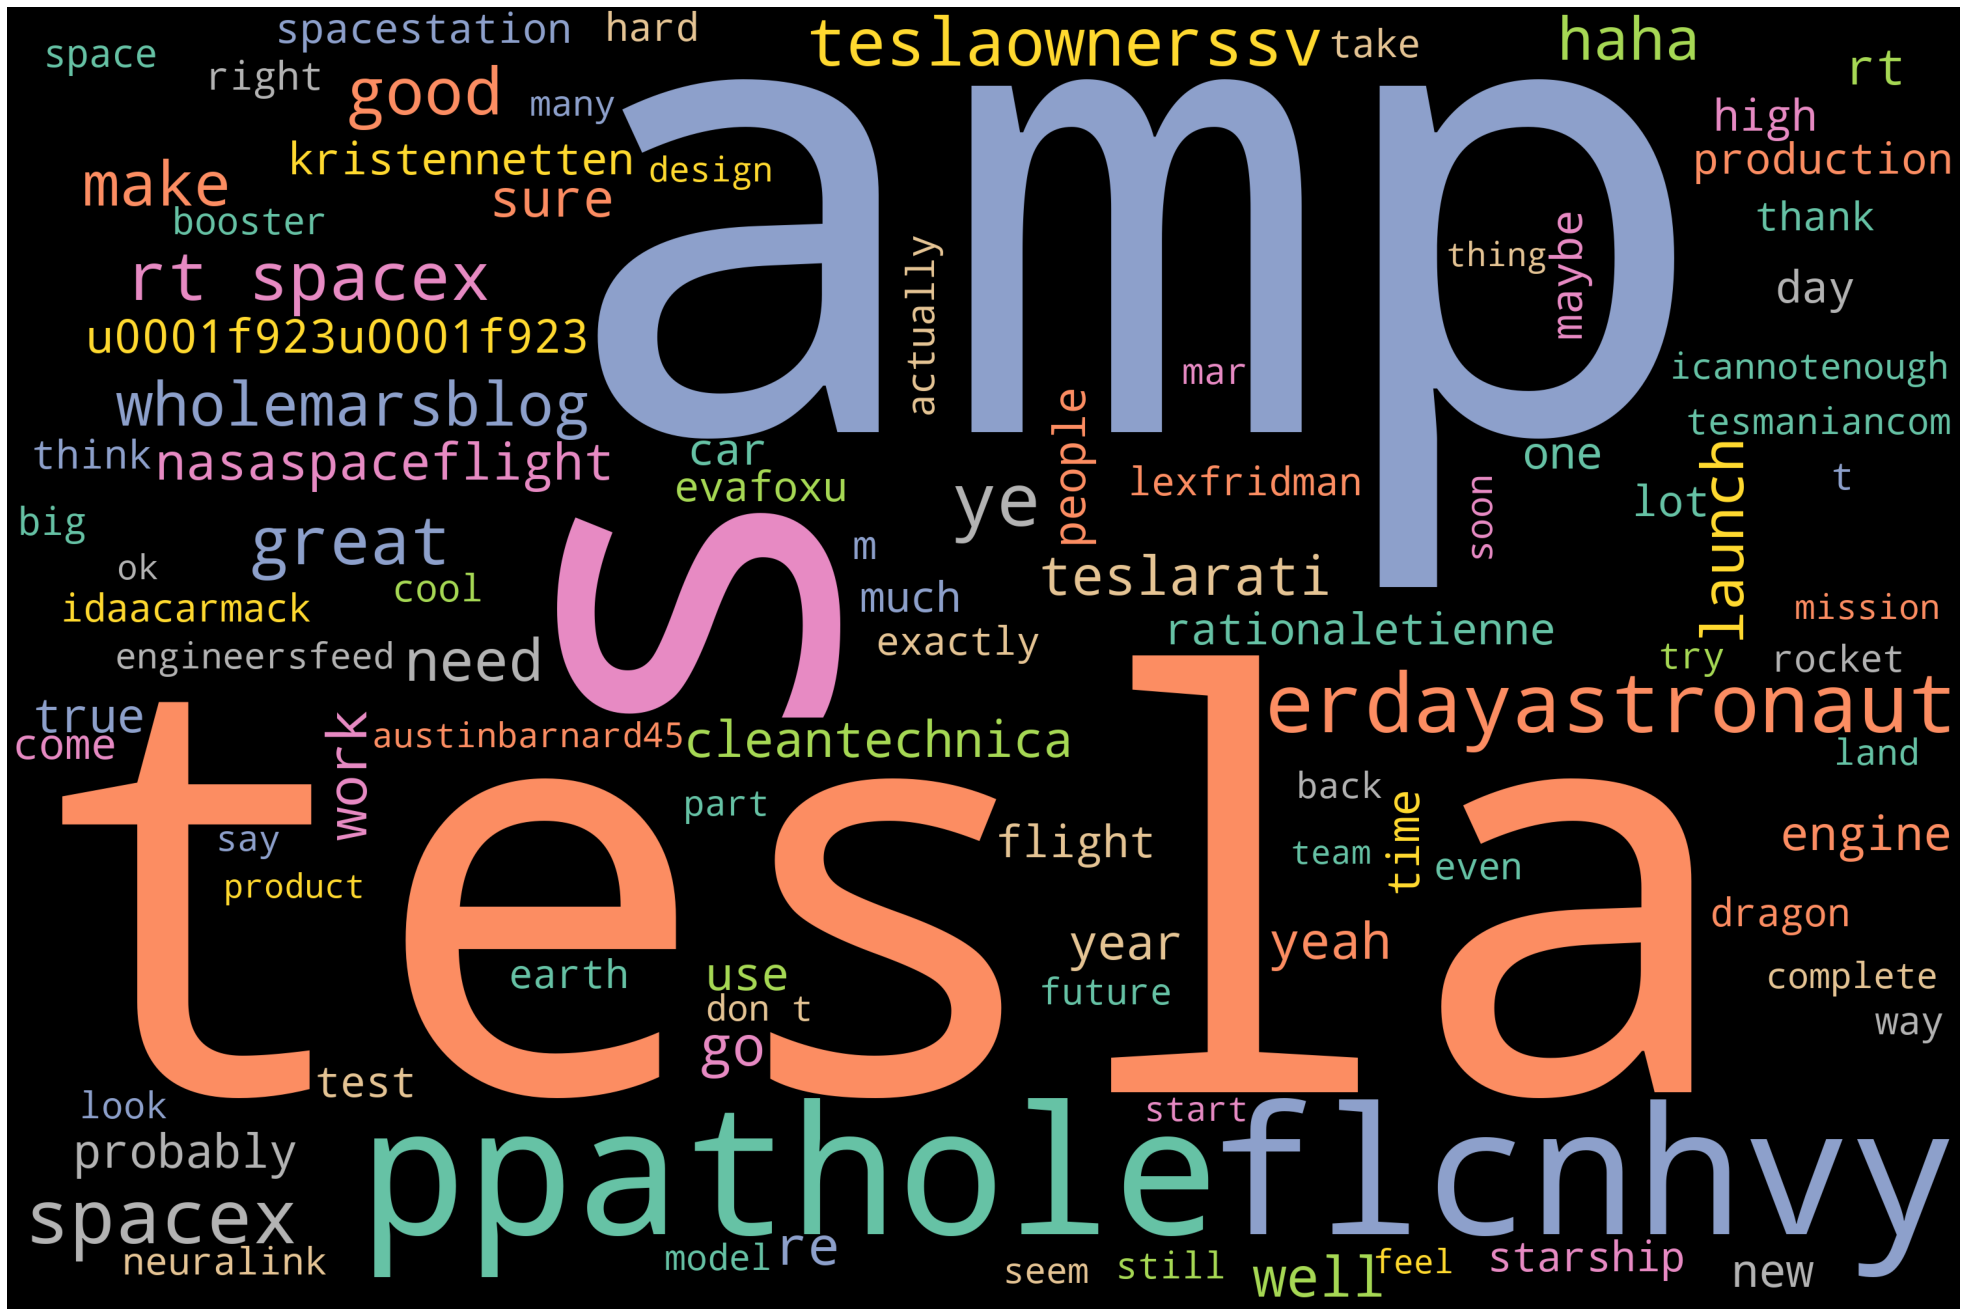

In [34]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(35,25))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate wordcloud

stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(clean_tweet)
# Plot
plot_cloud(wordcloud)

In [35]:
# Part of speech  Tagging

nlp = spacy.load("en_core_web_sm")
one_block = clean_tweet
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)


In [36]:
for token in doc_block:
    print(token, token.pos_)

kunalb11 PROPN
im PROPN
alien ADJ
idaacarmack NOUN
ray NOUN
trace NOUN
cyberpunk NOUN
hdr NOUN
nextlevel NOUN
have AUX
try VERB
joerogan PROPN
spotify VERB
great ADJ
interview NOUN
gtera27 NOUN
doge PROPN
underestimate ADJ
teslacn PROPN
congratulation NOUN
tesla VERB
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge ADJ
all DET
thought NOUN
would AUX
fail VERB
himself PRON
owenspark PROPN
flcnhvy PROPN
anonyx10 PROPN
haha PROPN
thanks PROPN
flcnhvy PROPN
anonyx10 PROPN
indeed ADV
tweet PROPN
definitely ADV
represent VERB
realworld PROPN
time PROPN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
givedirectly ADV
just ADV
send AUX
just ADV
agree VERB
clubhouse PROPN
kanyewest PROPN
geoffkeighley PROPN
unrealengine ADJ
its PROPN
get VERB
real ADJ
buy NOUN
dogecoin NOUN
lil NOUN
x PUNCT
toddler NOUN
hodler NOUN
joshmanmode NOUN
he PRON
definitely ADV
issue VERB
sentencing NOUN
seem

I PRON
kinda ADV
love VERB
etsy PROPN
thesheetztweetz VERB
it PRON
serve VERB
public ADJ
hamstring NOUN
starlink NOUN
today NOUN
amazon PROPN
satellite NOUN
system PROPN
nextspaceflight NOUN
were NOUN
hope NOUN
faa PROPN
approval NOUN
test NOUN
flight NOUN
tomorrow NOUN
afternoon NOUN
wholemarsblog NOUN
the DET
entire ADJ
stack NOUN
datum NOUN
collection NOUN
label PROPN
amp PROPN
inference NOUN
surround NOUN
video NOUN
th X
flcnhvy PROPN
wholemarsblog ADJ
yes INTJ
although SCONJ
crazy ADJ
turn VERB
fsd NOUN
wholemarsblog ADJ
tesla NOUN
steadily ADV
move VERB
nns ADJ
8 NUM
camera NOUN
surround NOUN
video NOUN
this PRON
enable ADJ
superhuman PROPN
selfdriving NOUN
naval ADJ
some DET
tyranny NOUN
also ADV
road NOUN
hell NOUN
mostly ADV
pave VERB
bad ADJ
intention NOUN
levine NOUN
catchy PROPN
megaconstellati PROPN
aviationintel PROPN
jetcitystar PROPN
larrypress PROPN
all DET
sat VERB
launch PROPN
next ADJ
year NOUN
laser NOUN
link NOUN
only ADV
megaconstellati PROPN
aviationintel PRO

make VERB
isnt ADJ
like ADP
vehicle NOUN
4thfromourstar NUM
play VERB
long ADJ
game NOUN
ashleevance NOUN
true ADJ
idaacarmack NOUN
I PRON
hope VERB
wing NOUN
dont PROPN
work PROPN
moon NOUN
def PROPN
well PROPN
mar PROPN
also ADV
runway VERB
ericrweinstein PROPN
hamiltonians PROPN
2v PROPN
potential ADJ
langrangian PROPN
play NOUN
teslaownerssv NOUN
well ADV
back ADP
work NOUN
teslaownerssv NOUN
how SCONJ
strange ADJ
use NOUN
signal PROPN
thehackersnew PROPN
ya PROPN
dont PROPN
say INTJ
remind VERB
timeless ADV
classic ADJ
univercurious ADJ
fast ADJ
water NOUN
tiny ADJ
rock NOUN
flcnhvy NOUN
yes INTJ
occams ADJ
razor NOUN
actually ADV
third ADV
likely ADJ
as SCONJ
see VERB
external ADJ
observer NOUN
participant NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADJ
ppathole NOUN
dumb ADV
dumber ADV
great ADJ
movie NOUN
tho DET
this DET
call NOUN
domino NOUN
effect NOUN
dtrford PROPN
austinbarnard45 NOUN
alexsvanart PROPN
ercxspace PROPN
spceenthusiast PROPN
spacexvision NOUN
tomdix

reach VERB
apogee PROPN
wouldve PROPN
great ADJ
controlling NOUN
way NOUN
put AUX
thank VERB
south ADJ
texas PROPN
support VERB
this DET
gateway NOUN
mar PROPN
life NOUN
universe VERB
everything PRON
erdayastronaut NOUN
yeah INTJ
engine NOUN
great PROPN
mar PROPN
come VERB
fuel NOUN
header NOUN
tank NOUN
pressure NOUN
low ADJ
landing NOUN
burn NOUN
cause VERB
touchdown NOUN
velocity NOUN
high ADJ
amp PROPN
rud PROPN
get VERB
successful ADJ
ascent NOUN
switchover PROPN
header NOUN
tank NOUN
amp NOUN
precise ADJ
flap NOUN
control NOUN
landing NOUN
point NOUN
thebabylonbee ADJ
u0001f920 ADV
wonderofscience VERB
nearorbital ADJ
space NOUN
fast ADJ
way NOUN
travel VERB
long ADJ
distance NOUN
earth NOUN
spacex AUX
spacestation NOUN
its PROPN
call NOUN
space NOUN
station NOUN
its PROPN
actually ADV
move VERB
around ADP
earth NOUN
25 NUM
time NOUN
spee NOUN
rt PROPN
spacex PROPN
timelapse PROPN
dragon PROPN
approach NOUN
 PROPN
two NUM
dragon NOUN
dock PROPN
spacestation NOUN
so NOUN
lo

steel NOUN
pipe NOUN
shield NOUN
amp NOUN
add VERB
watercoole ADJ
steel NOUN
pipe NOUN
test NOUN
pad NOUN
lugg4s1 NOUN
pcgamer NOUN
about ADP
2 NUM
sec PROPN
start AUX
engine NOUN
martyte NOUN
cover VERB
concrete ADJ
shatter NOUN
send VERB
blade NOUN
erdayastronaut NOUN
rweb11742 PROPN
the DET
amazing ADJ
thing NOUN
rocket NOUN
engine NOUN
sometimes ADV
dont VERB
blow VERB
the DET
pcgamer NOUN
we PRON
count VERB
atom PROPN
point PROPN
djsnm PROPN
erdayastronaut PROPN
charlesnotrump NOUN
rweb11742 PROPN
absolutely ADV
productionteste ADJ
rocket NOUN
engine NOUN
90 NUM
erdayastronaut NOUN
charlesnotrump NOUN
rweb11742 PROPN
our PRON
first ADJ
merlin NOUN
engine NOUN
design NOUN
really ADV
bad ADJ
tbh NOUN
nothing PRON
work VERB
well ADV
billhuang688 ADJ
johnnacrider1 NOUN
timmerenginerd NOUN
jack PROPN
maybe ADV
I PRON
love VERB
irony NOUN
haha PROPN
greenisclutch PROPN
johnnacrider1 PROPN
timmerenginerd PROPN
jack PROPN
theyre PROPN
way NOUN
hopefully ADV
teslaquila X
next ADJ
month N

be AUX
inside ADP
mind NOUN
linustech PROPN
spacexstarlink PROPN
spacex VERB
u0001f1e8u0001f1e6 PROPN
u0001f600 ADJ
ppathole PROPN
just ADV
look VERB
problemsolver NOUN
get VERB
thing NOUN
do VERB
high ADJ
sense NOUN
urgency NOUN
dont VERB
care NOUN
go VERB
school NOUN
when SCONJ
send VERB
resume NOUN
please INTJ
describe VERB
hard ADJ
problem NOUN
solve VERB
amp NOUN
exactly ADV
solve VERB
a DET
new ADJ
banner NOUN
need AUX
neither CCONJ
hard ADV
leave VERB
right ADJ
ppathole PROPN
another DET
fine ADJ
day NOUN
simulation NOUN
nereide NOUN
faraday NOUN
invent NOUN
electric ADJ
motor NOUN
tesla NOUN
commutatorfree NOUN
threephase NOUN
ac VERB
induction NOUN
motor PROPN
nereide PROPN
maxwell PROPN
amazing ADJ
should AUX
recognition PROPN
tesla PROPN
motors PROPN
inc PROPN
almost ADV
call VERB
faraday NOUN
420 NUM
ten NUM
time NOUN
well INTJ
42 NUM
u0001f917 NOUN
rt PROPN
spacex PROPN
deployment NOUN
gps NOUN
iii4 PROPN
confirm VERB
rt PROPN
spacex PROPN
falcon PROPN
9s NUM
first ADJ
s

carry VERB
people NOUN
amp ADJ
cargo NOUN
around ADP
ear NOUN
teslarati NOUN
with ADP
fsd NOUN
get VERB
stick ADJ
lot NOUN
local ADJ
maximum ADJ
wasnt NOUN
clear ADJ
hit VERB
ceiling NOUN
this DET
time NOUN
its PROPN
right ADJ
rationaletienne NOUN
28delayslater NUM
thank VERB
much ADV
accurate ADJ
haha NOUN
28delayslater NUM
this DET
graph NOUN
appear VERB
upside ADJ
teslarati NOUN
sheer ADJ
magnitude NOUN
entire ADJ
production NOUN
system NOUN
hard ADV
appreciate VERB
almost ADV
every PRON
element NOUN
productio PROPN
teslaclubin PROPN
cleantechnica PROPN
will AUX
release VERB
order NOUN
configurator NOUN
probably ADV
jan PROPN
cleantechnica PROPN
limit VERB
fsd NOUN
beta NOUN
releasing NOUN
tuesday PROPN
next ADJ
week NOUN
promise VERB
this DET
first ADJ
limited ADJ
shortword NOUN
jwangark NOUN
the DET
socs NOUN
sync NOUN
20 NUM
30 NUM
timessec NOUN
exchange NOUN
output PROPN
nns PROPN
jwangark PROPN
tesla NOUN
fsd NOUN
computers NOUN
dual ADJ
socs NOUN
function NOUN
like ADP
twi

zshauladventure PROPN
nasakennedy PROPN
ulalaunch PROPN
spacex AUX
natreconofc PROPN
good ADJ
see VERB
inspire ADJ
future ADJ
space NOUN
somiteslagirl NOUN
model3owner PROPN
futurejurvetson PROPN
cfsenergy PROPN
cupplasma PROPN
mit VERB
the DET
new ADJ
heat NOUN
pump NOUN
model NOUN
y PROPN
thatt3slaguy PROPN
model3owners PROPN
futurejurvetson PROPN
cfsenergy PROPN
cupplasma PROPN
mit VERB
yes INTJ
come VERB
soon ADV
ercxspace NOUN
spacex PROPN
felixschlang PROPN
marcushousegame PROPN
erdayastronaut PROPN
nasaspaceflight PROPN
great ADJ
render VERB
the DET
circumferentia PROPN
model3owner PROPN
futurejurvetson PROPN
cfsenergy PROPN
cupplasma PROPN
mit VERB
thats INTJ
hard ADV
have AUX
try VERB
push VERB
c PROPN
futurejurvetson PROPN
cfsenergy PROPN
cupplasma NOUN
mit VERB
its PROPN
cool ADJ
amp NOUN
sure ADJ
amp NOUN
do AUX
I PRON
suspect VERB
good ADJ
cas NOUN
austinbarnard45 NOUN
weld VERB
esthetic ADJ
improve NOUN
greatly ADV
upcoming ADJ
starship NOUN
ppathole PROPN
haha PROPN
tr

ppathole PROPN
eugenelee3 NOUN
univercurious ADJ
112 NUM
charliemunger00 NOUN
univercurious ADJ
munger NOUN
right ADJ
eugenelee3 NOUN
univercurious ADJ
univercurious ADJ
blackschole ADJ
formula NOUN
kinda ADV
b X
big ADJ
difference NOUN
finance NOUN
approximation NOUN
amp NOUN
fundamental ADJ
physics NOUN
pure ADJ
math NOUN
wintonark NOUN
true ADJ
disruptresearch NOUN
tesla NOUN
well ADV
understand VERB
collection NOUN
dozen NOUN
startup NOUN
mostly ADV
series NOUN
increasingly ADV
disruptresearch VERB
tesla PROPN
rampd PROPN
productivity NOUN
exceptionally ADV
good ADJ
due ADJ
caliber NOUN
engineering NOUN
talent NOUN
tesla NOUN
model NOUN
s PART
amp PROPN
x PUNCT
hospitalgrade ADJ
hepa NOUN
air NOUN
filter NOUN
3 NUM
amp NOUN
y X
really ADV
good ADJ
this DET
big ADJ
effect NOUN
healt NOUN
kleefilmreview VERB
rt PROPN
teslarati PROPN
tesla VERB
energy NOUN
ramp NOUN
hire NOUN
giga PROPN
new PROPN
york PROPN
accelerate VERB
solar ADJ
production NOUN
techgnostik NOUN
rbreich ADJ
touché 

 PROPN
transcanada PROPN
supercharge VERB
u2705 PROPN
 PROPN
model PROPN
y PROPN
deliverie PROPN
u2705 PROPN
 PROPN
leasing NOUN
model PROPN
y PROPN
amp PROPN
model NOUN
3 NUM
u0001f3af PROPN
nextspaceflight NOUN
payload NOUN
reduction NOUN
due ADJ
reusability NOUN
booster NOUN
amp NOUN
fair ADJ
lt40 PROPN
f9 PROPN
amp NOUN
recovery NOUN
amp NOUN
refurb PROPN
lt1 PROPN
zubinanary PROPN
spaceintellige3 NOUN
guidodecaso NOUN
cnunezimage VERB
yes INTJ
huge ADJ
nuts ADJ
haha PROPN
teslarati NOUN
we PRON
really ADV
need VERB
big ADJ
one NUM
adult NOUN
squeeze NOUN
guarantee NOUN
make VERB
party NOUN
fun NOUN
work NOUN
well ADV
flamethrower ADJ
spaceintellige3 NOUN
guidodecaso NOUN
cnunezimage VERB
my PRON
favorite ADJ
one NUM
tension NOUN
dof ADJ
compression NOUN
new ADJ
roadster NOUN
w AUX
davidgokhshtein X
yes INTJ
aloha NOUN
welcome VERB
back ADP
space NOUN
u0001f4ab PROPN
erdayastronaut NOUN
yeah INTJ
post NOUN
shortly ADV
krystofmitka PROPN
biindia PROPN
win VERB
worst PROPN
person

team PROPN
nasa PROPN
spacex AUX
remain VERB
go VERB
plan NOUN
bring VERB
astrodoug NOUN
astrobehnken VERB
home PROPN
earth NOUN
sunday PROPN
rt PROPN
nasa PROPN
they PRON
re AUX
come VERB
home ADV
u0001f30eu0001fa82 NOUN
on ADP
aug PROPN
1 NUM
astronaut NOUN
astrobehnken VERB
astrodoug PROPN
depart NOUN
spacestation NOUN
spacexs NOUN
crew NOUN
dra PROPN
the DET
great ADJ
pyramid NOUN
tall ADJ
structure NOUN
make VERB
human ADJ
3800 NUM
year NOUN
three NUM
thousand NUM
eight NUM
hundred NUM
year NOUN
rt PROPN
commercialcrew PROPN
nasa PROPN
spacex AUX
remain VERB
go VERB
plan NOUN
bring VERB
astrodoug NOUN
astrobehnken VERB
home NOUN
earth NOUN
weekend NOUN
team NOUN
c VERB
waitbutwhy INTJ
so ADV
true ADJ
ramse PROPN
ii PROPN
u0001f60e PROPN
alien ADJ
build NOUN
pyramid PROPN
obv PROPN
iearnsomethlng PROPN
ancient ADJ
egypt PROPN
incredible ADJ
esthetic ADJ
stand NOUN
day NOUN
notch NOUN
u263aufe0f PRON
matfabrix NOUN
engineersfeed ADJ
witch NOUN
logic NOUN
matfabrix NOUN
engineersfeed

roof PROPN
giga PROPN
berlin PROPN
pontolemaeus PROPN
silverdegeneral ADJ
bbcsciencenew VERB
exactly ADV
serious ADJ
problem NOUN
ratio NOUN
retirees PROPN
workers PROPN
vincentdiong PROPN
gerberkawasaki PROPN
consider VERB
flcnhvy ADJ
spacex ADP
small ADJ
note NOUN
latch NOUN
post NOUN
near ADP
base NOUN
go VERB
amp PROPN
power NOUN
ethernet NOUN
wire NOUN
less ADV
obtrusive ADJ
production NOUN
version NOUN
bbcsciencenews PROPN
ppathole PROPN
bbcsciencenews ADV
this DET
thing NOUN
call VERB
money PROPN
slow ADJ
lossy PROPN
amp PROPN
unsecure NOUN
database NOUN
labor NOUN
allocati PROPN
nnalinas PROPN
bbcsciencenew PROPN
try AUX
set VERB
good ADJ
example NOUN
haha PROPN
mars PROPN
need VERB
people NOUN
gerberkawasaki VERB
great ADJ
work NOUN
tesla NOUN
software PROPN
engineering NOUN
bbcsciencenews NOUN
population NOUN
collapse NOUN
2nd NOUN
big ADJ
danger NOUN
civilization NOUN
ai PROPN
imo PROPN
erdayastronaut PROPN
flcnhvy PROPN
spacex INTJ
yeah INTJ
take VERB
less ADJ
minute NOUN

In [37]:
#filtering for nouns and verbs only 
noun_verb = [token.text for token in doc_block if  token.pos_ in  ('NOUN', 'VERB')]
print(noun_verb)

['idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'spotify', 'interview', 'gtera27', 'congratulation', 'tesla', 'execution', 'year', 'year', 'ox', 'frodo', 'thought', 'fail', 'represent', 'allocation', 'outcome', 'agree', 'get', 'buy', 'dogecoin', 'lil', 'toddler', 'hodler', 'joshmanmode', 'issue', 'sentencing', 'seem', 'bit', 'thank', 'fix', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'power', 'crypto', 'wallet', 'won\x92t', 'give', 'avoid', 'cost', 'app', 'suck', 'launch', 'element', 'gateway', 'mission', 'blkmdl3', 'predict', 'cash', 'flow', 'starlink', 'adamklotz', 'starlink', 'endeavor', 'adamklotz', 'spacex', 'pass', 'chasm', 'cash', 'flow', 'year', 'idaacarmack', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'adamklotz', 'price', 'country', 'difference', 'taxis', 'intend', 'earth', 'idea', 'apply', 'tesla', 'danzpalmer', 'xprize', 'team', 'manage', 'carbon', 'capture', 'prize', 'tesla', 'receive', 'stock', 'comp'

In [38]:
#counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(noun_verb)
sum_words = X.sum(axis=0)
words_frequency = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_frequency = sorted(words_frequency,key = lambda x: x[1],reverse=True)
wf_df = pd.DataFrame(words_frequency)
wf_df.columns = ['word', 'count']

wf_df

,word,count
0,tesla,142
1,amp,99
2,erdayastronaut,73
3,spacex,66
4,make,64
...,...,...
2281,answer,1
2282,tweet,1
2283,priority,1
2284,propaganda,1


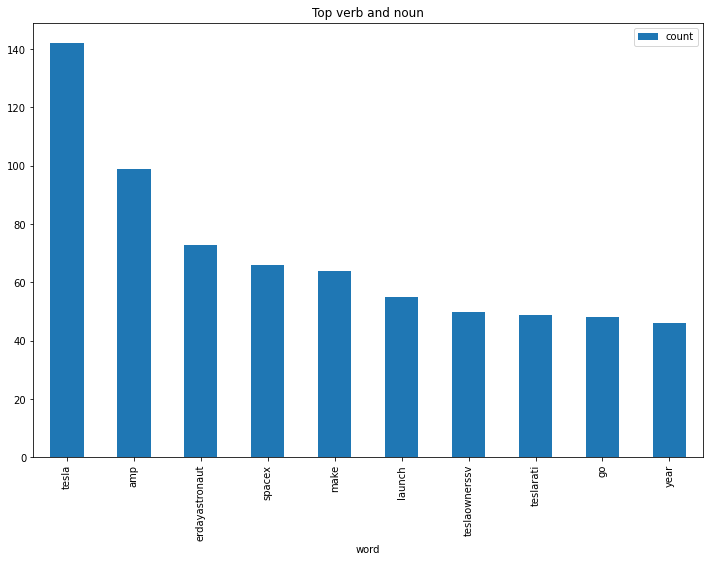

In [39]:
#Visualizing results
# Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word',figsize = (12,8),title='Top verb and noun')
plt.show()

## Emotion Mining - sentiment analysis

In [40]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(' '.join(elon_musk_data))
sentence

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [41]:
sent_dataframe = pd.DataFrame(sentence,columns=['sentence'])
sent_dataframe

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [42]:
# Emotion Lexican - Affin
affin = pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

FileNotFoundError: [Errno 2] No such file or directory: 'Afinn.csv'

In [ ]:
affinity_score = affin.set_index('word')['value'].to_dict()
affinity_score

In [ ]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_score

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# test that it works
calculate_sentiment(text = 'amazing')

In [ ]:
sent_dataframe['sentiment_value'] = sent_dataframe['sentence'].apply(calculate_sentiment)

In [ ]:
# how many words are in the sentence?
sent_dataframe['word_count'] = sent_dataframe['sentence'].str.split().apply(len)
sent_dataframe['word_count']

In [ ]:
sent_dataframe.sort_values(by='sentiment_value')

In [ ]:
# Sentiment score of the whole review
sent_dataframe['sentiment_value'].describe()

In [ ]:
# negative Sentiment score of the whole review
sent_dataframe[sent_dataframe['sentiment_value']<=0]

In [ ]:
# positive sentiment score of the whole review
sent_dataframe[sent_dataframe['sentiment_value']>0]

In [ ]:
# Adding index cloumn
sent_dataframe['index']=range(0,len(sent_dataframe))
sent_dataframe

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_dataframe['sentiment_value'])
None


In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_dataframe)
plt.show()

In [ ]:
# Correlation analysis
sent_dataframe.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')
None

In [ ]:
import plotly.express as px 

In [ ]:
fig = px.bar(sent_dataframe[:20], x='word_count', y='sentiment_value', title='Counts of top bigrams', template='plotly_white', labels={'ngram': 'Bigram', 'count': 'Count'})
fig.show()

In [ ]:
fig = px.treemap(sent_dataframe, title='Treemap chart by companies and whether complaint mentions credit report.',
                 path=['word_count','sentiment_value'], color='sentence', color_continuous_scale=px.colors.sequential.GnBu)
fig.show()

In [ ]:
fig = px.bar(sent_dataframe, x='word_count', y='sentiment_value', template='plotly_white', orientation='h',
             labels={'portion': '% of Complaints', 'bigram': 'Bigram', 'company': 'Company'},
             color='sentence', color_discrete_sequence=px.colors.qualitative.Safe)
fig.update_layout(font=dict(size=10, color='DarkSlateGray'))
fig.update_layout(width=1200, height=500)
fig.show()

In [ ]:
fig = px.bar(sent_dataframe,  x='word_count', y='sentiment_value'
             , color='sentence', template='plotly_white', color_discrete_sequence=px.colors.qualitative.Bold
             , labels={'word_count', 'sentiment_value'})
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=0.1, y=1.1))
fig.update_yaxes(title='', showticklabels=False)
fig.show()

# =======================================================

#### let us see how to visualise relation between part of speech    ### just for  example

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')
from spacy import displacy
doc=nlp(u'Anil is working on ExcelR assignment.')

import warnings 
warnings.filterwarnings('ignore') 
from matplotlib import pyplot as plt

In [ ]:
displacy.render(doc, style='dep')
plt.show()

In [ ]:
### Now let’s fill in a few colors to this representation with some options:

In [ ]:
doc1=nlp(u'I am working on ExcelR assignment.')
options={'distance':110,'compact':'True', 'color':'white','bg':'red','font':'Times'}
displacy.render(doc1, style='dep',options=options)
plt.show()